# <center>PUBG Finih Placement Prediction</center>

In [2]:
# Import lib
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import numpy

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as prepro
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Setup complete !')

Setup complete !


In [3]:
# Import data
def importData():
    # Import from file
    train = pd.read_csv("Datas/train_V2.csv")
    test = pd.read_csv("Datas/test_V2.csv")

    # Split train to have validate
    testSize = max(test.count())    
    train, validate = train_test_split(train, test_size=testSize)
    
    return train, validate, test

train, validate, test = importData()

## Examine data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512792 entries, 3926984 to 4408453
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoi

In [4]:
# Print the first 5 rows of the data
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3926984,b70791324c5724,d19c2bee71e19d,5669df2c3f81cb,0,0,42.75,0,0,0,47,...,0,0.0,0,0.00,0,0,1667.00,2,0,0.8776
254896,da358e97c36e6b,69e9ad11efccfe,a21b6899c99b0b,3,5,201.30,1,0,2,25,...,0,0.0,0,0.00,0,0,3222.00,5,1567,0.9677
3993884,39ab4850a7aaf5,a6130462a1d999,5abb493d2bf4f3,0,0,0.00,0,0,0,89,...,0,0.0,0,0.00,0,0,23.15,1,0,0.0000
2821632,fe062257d236bf,a0671c564471ac,614e7a7b63cbdf,0,1,292.70,1,0,1,13,...,1,0.0,0,0.00,0,1,2588.00,9,0,0.9259
2218582,04baf947c957b7,1efdc1fa12fd5d,3b88aad19da24f,2,4,103.40,1,0,0,25,...,0,205.8,0,10.85,0,0,2740.00,10,0,0.8750


In [5]:
train.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.308167,0.406222,0.301153,0.197877,0.228211,-0.290204,0.038671,0.319105,0.243614,...,0.198291,0.111263,0.011805,0.023215,0.006129,0.058053,0.290875,0.243416,0.023779,0.299615
boosts,0.308167,1.000000,0.521869,0.358706,0.335742,0.535821,-0.554680,0.008447,0.502073,0.405248,...,0.253003,0.328863,0.035061,0.107895,0.013068,0.087380,0.640117,0.407790,-0.007401,0.634193
damageDealt,0.406222,0.521869,1.000000,0.735305,0.614112,0.342762,-0.677321,0.050085,0.888713,0.703513,...,0.256163,0.141019,0.054124,0.036218,0.015259,0.081038,0.398104,0.353363,0.018030,0.440539
DBNOs,0.301153,0.358706,0.735305,1.000000,0.470903,0.264898,-0.555702,0.042366,0.707259,0.646888,...,0.300469,0.102769,0.036743,0.017473,0.069283,0.059141,0.284876,0.218207,0.010961,0.280444
headshotKills,0.197877,0.335742,0.614112,0.470903,1.000000,0.200417,-0.471056,0.023987,0.674254,0.513511,...,0.150446,0.076535,0.014667,0.027300,0.008415,0.039770,0.252061,0.217563,0.005064,0.278629
heals,0.228211,0.535821,0.342762,0.264898,0.200417,1.000000,-0.385948,-0.002547,0.311946,0.270621,...,0.236238,0.297468,0.024736,0.080161,0.035233,0.062601,0.430283,0.309952,-0.010873,0.427804
killPlace,-0.290204,-0.554680,-0.677321,-0.555702,-0.471056,-0.385948,1.000000,-0.022962,-0.730545,-0.810470,...,-0.269945,-0.235686,-0.056812,-0.089134,-0.037557,-0.073727,-0.590084,-0.490842,-0.002306,-0.718989
killPoints,0.038671,0.008447,0.050085,0.042366,0.023987,-0.002547,-0.022962,1.000000,0.036229,0.036598,...,0.011687,-0.029134,-0.002832,-0.004931,-0.040119,-0.010169,0.004749,-0.003930,0.983429,0.012713
kills,0.319105,0.502073,0.888713,0.707259,0.674254,0.311946,-0.730545,0.036229,1.000000,0.802386,...,0.253331,0.114700,0.065261,0.038690,0.017348,0.080460,0.374962,0.336590,0.007077,0.420089
killStreaks,0.243614,0.405248,0.703513,0.646888,0.513511,0.270621,-0.810470,0.036598,0.802386,1.000000,...,0.242205,0.097926,0.067156,0.033993,0.027732,0.064388,0.327526,0.275551,0.008235,0.377414


## Normalization

In [1]:
def normalization(data):
    data = data.dropna()
    le = prepro.LabelEncoder()
    le.fit(data["matchType"])
    data["matchType"] = le.transform(data["matchType"])
    le.fit(data["Id"])
    data["Id"] = le.transform(data["Id"])
    le.fit(data["groupId"])
    data["groupId"] = le.transform(data["groupId"])
    le.fit(data["matchId"])
    data["matchId"] = le.transform(data["matchId"])
    return data

train = normalization(train)
#validate = normalization(validate)
#test = normalization(test)

NameError: name 'train' is not defined

In [7]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
3926984,1796118,1251994,16114,0,0,42.75,0,0,0,47,...,0,0.0,0,0.00,0,0,1667.00,2,0,0.8776
254896,2141387,633954,30299,3,5,201.30,1,0,2,25,...,0,0.0,0,0.00,0,0,3222.00,5,1567,0.9677
3993884,565567,992760,16941,0,0,0.00,0,0,0,89,...,0,0.0,0,0.00,0,0,23.15,1,0,0.0000
2821632,2493556,958771,18170,0,1,292.70,1,0,1,13,...,1,0.0,0,0.00,0,1,2588.00,9,0,0.9259
2218582,46598,185255,11021,2,4,103.40,1,0,0,25,...,0,205.8,0,10.85,0,0,2740.00,10,0,0.8750


## Plot the data

<AxesSubplot:title={'center':'PUBG killPlace impact on winPlacePerc'}, xlabel='killPlace', ylabel='winPlacePerc'>

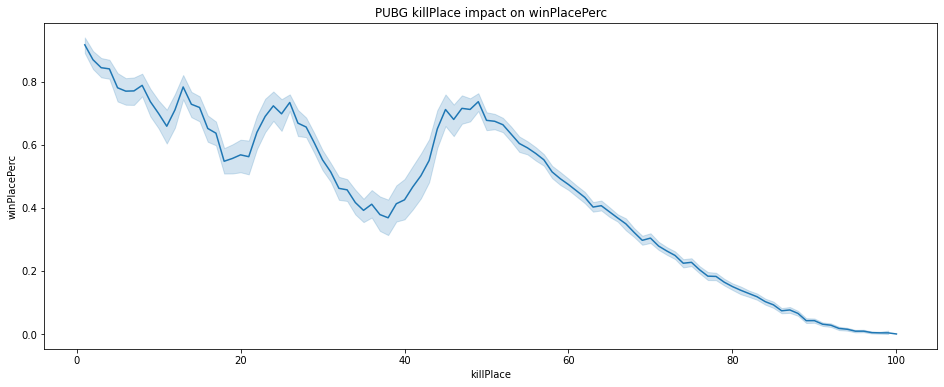

In [8]:
data_to_plot = train.head(10000)

plt.figure(figsize=(16,6))
plt.title('PUBG killPlace impact on winPlacePerc')
sns.lineplot(x=data_to_plot['killPlace'], y=data_to_plot['winPlacePerc'])

<AxesSubplot:title={'center':'data in link with KillPlace column'}, xlabel='kills', ylabel='killPlace'>

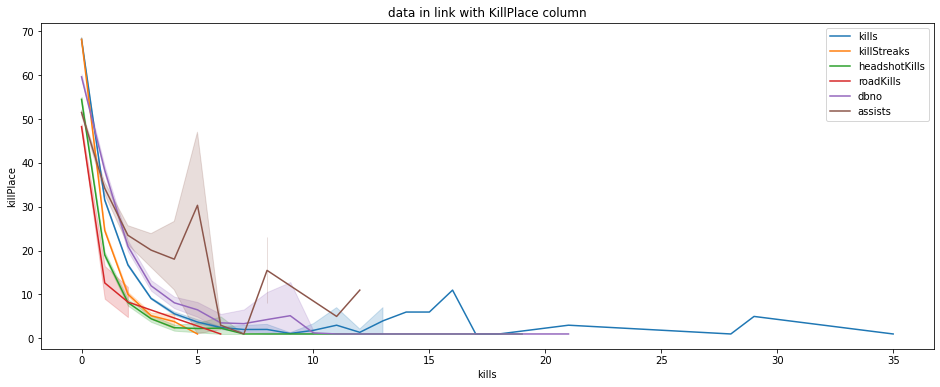

In [9]:
# Attention la valeur de killPlace est un classement donc la valeur 1 est la meilleure place et 100 la pire

plt.figure(figsize=(16,6))

plt.title("data in link with KillPlace column")

sns.lineplot(x=data_to_plot['kills'] , y=data_to_plot['killPlace'], label="kills")
sns.lineplot(x=data_to_plot['killStreaks'] , y=data_to_plot['killPlace'], label="killStreaks")
sns.lineplot(x=data_to_plot['headshotKills'] , y=data_to_plot['killPlace'], label="headshotKills")
sns.lineplot(x=data_to_plot['roadKills'] , y=data_to_plot['killPlace'], label="roadKills")
sns.lineplot(x=data_to_plot['DBNOs'] , y=data_to_plot['killPlace'], label="dbno")
sns.lineplot(x=data_to_plot['assists'] , y=data_to_plot['killPlace'], label="assists")

# damageDealt ? correspond un peu mais au début pas vraiment

## Removing columns

In [10]:
# Drop columns link to killPlace
columnsLinkToKillPlace = ["kills", "killStreaks", "headshotKills", "roadKills", "DBNOs", "assists"]

train = train.drop(columns=columnsLinkToKillPlace).copy()
validate = validate.drop(columns=columnsLinkToKillPlace).copy()
test = test.drop(columns=columnsLinkToKillPlace).copy()

# Regroup distance
train["distance"] = train["rideDistance"] + train["swimDistance"] + train["walkDistance"]
train = train.drop(columns=["rideDistance", "swimDistance", "walkDistance"])

validate["distance"] = validate["rideDistance"] + validate["swimDistance"] + validate["walkDistance"]
validate = validate.drop(columns=["rideDistance", "swimDistance", "walkDistance"])

test["distance"] = test["rideDistance"] + test["swimDistance"] + test["walkDistance"]
test = test.drop(columns=["rideDistance", "swimDistance", "walkDistance"])

In [11]:
# Temporairement
train = train.drop(columns=["rankPoints", "killPoints", "winPoints"])
test = test.drop(columns=["rankPoints", "killPoints", "winPoints"])
validate = validate.drop(columns=["rankPoints", "killPoints", "winPoints"])

## Basic data exploration

In [12]:
train.describe()

,Id,groupId,matchId,boosts,damageDealt,heals,killPlace,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,teamKills,vehicleDestroys,weaponsAcquired,winPlacePerc,distance
count,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06,2.512791e+06
mean,1.256395e+06,7.645389e+05,2.397560e+04,1.106753e+00,1.307123e+02,1.369797e+00,4.759510e+01,2.302494e+01,1.579634e+03,1.083224e+01,4.450115e+01,4.300489e+01,1.646619e-01,2.381893e-02,7.934205e-03,3.660194e+00,4.728095e-01,1.765167e+03
std,7.253804e+05,4.414871e+05,1.384892e+04,1.714910e+00,1.707670e+02,2.677490e+00,2.746518e+01,5.105790e+01,2.587125e+02,5.325606e+00,2.382813e+01,2.328980e+01,4.716883e-01,1.674013e-01,9.262201e-02,2.451338e+00,3.074226e-01,2.183266e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.330000e+02,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.281975e+05,3.820495e+05,1.197900e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,1.367000e+03,3.000000e+00,2.800000e+01,2.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e-01,1.581000e+02
50%,1.256395e+06,7.644090e+05,2.398200e+04,0.000000e+00,8.424000e+01,0.000000e+00,4.700000e+01,0.000000e+00,1.439000e+03,1.400000e+01,3.000000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,4.583000e-01,7.884000e+02
75%,1.884592e+06,1.147128e+06,3.596900e+04,2.000000e+00,1.860000e+02,2.000000e+00,7.100000e+01,2.132000e+01,1.851000e+03,1.500000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,7.407000e-01,2.728000e+03
max,2.512790e+06,1.529077e+06,4.796300e+04,2.400000e+01,6.616000e+03,8.000000e+01,1.000000e+02,1.075000e+03,2.237000e+03,1.500000e+01,1.000000e+02,1.000000e+02,2.800000e+01,1.200000e+01,5.000000e+00,1.530000e+02,1.000000e+00,4.127010e+04


In [13]:
train_Y = train.winPlacePerc
train_X = train.drop(columns=["winPlacePerc"])

### Decision tree regressor

In [24]:
# Building decision tree regressor model
dtr_model = DecisionTreeRegressor(random_state=1)
dtr_model.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=1)

In [25]:
# Decision tree regressor prediction
val_X = validate.drop(columns=["winPlacePerc"])
val_y = validate["winPlacePerc"]

val_predictions = dtr_model.predict(val_X)

In [1]:
#TODO calculer le biais https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html

## Decision tree model quality

In [26]:
dtr_model.score(val_X, val_y)

0.8237253315458148

In [29]:
# Mean Absolute Error (average of all error), error = | target - prediction |
print(mean_absolute_error(val_y, val_predictions))

# Donne la différence moyenne entre les prédictions obtenues et les valeurs targets

0.08789882373561014


In [ ]:
##TODO underfitting and Overfitting
# Random Forest
